In [1]:
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
os.chdir(parent_dir)
from torch.utils.data import DataLoader
from conf.config import GlobalConfig
from dataset.data_new import CARLA_Data
import numpy as np
from matplotlib import pyplot as plt

/home/zhk/anaconda3/envs/csg/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(os.getcwd())
config = GlobalConfig()
val_set = CARLA_Data(root=config.val_data, config=config)

/home/zhk/project/vae/vae
100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


In [3]:
red = np.array([149, 53, 83],dtype=np.uint8) # obstacle
blue = np.array([112, 137, 215], dtype = np.uint8) # road
white = np.array([255,255,255],dtype=np.uint8) # void
orange = np.array([228, 147, 24], dtype=np.uint8) # roadlines
ids = {'None':0, 'Buildings':1, 'Fences':2, 'Other':3, 'Pedestrians':4, 'Pole':5, 'RoadLines':6, 'Roads':7, 'Sidewalks':8, 'Vegetation':9, 'Vehicles':10, 'Walls':11, 'TrafficSigns':12, 'Sky':13, 'Ground': 14, 'Bridge': 15, 'RailTrack': 16, 'GuardRail':17, 'TrafficLight':18, 'Static':19, 'Dynamic':20, 'Water':21, 'Terrain':22}
id_obstacle = [1,2,3,4,5,8,9,10,11,12,14,15,16,17,18,19,20,21,22]

In [4]:
def paint(seg):
    (c,w,h) = seg.shape

    image = np.zeros([w,h,3], dtype=np.uint8)
    image[seg[0] == 1] = red
    image[seg[1] == 1] = blue
    image[seg[2] == 1] = orange
    return image

torch.Size([3, 300, 400])


TypeError: Invalid shape (3, 300, 400) for image data

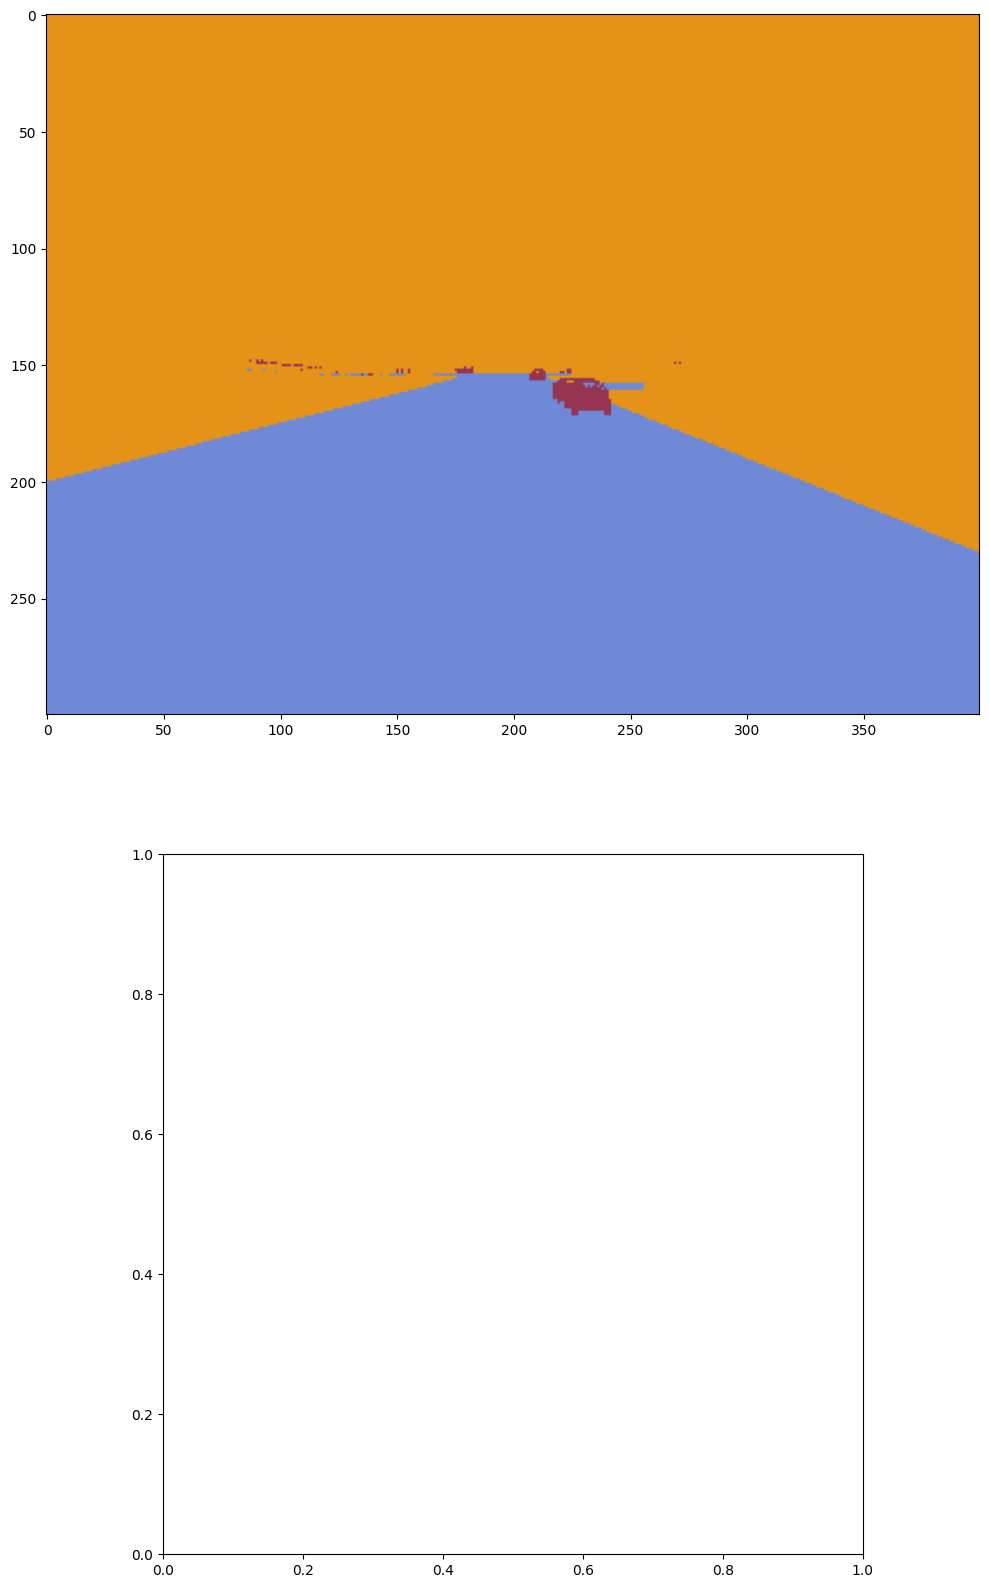

In [7]:
dataloader_val = DataLoader(val_set, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
for data in dataloader_val:
    lfr_seg = data['seg_front']
    lfr_seg_sample = lfr_seg[0][0]
    lfr_seg_sample = paint(lfr_seg_sample)

    lfr = data['front']
    lfr_img_sample = lfr[0][0]
    print(lfr_img_sample.shape)
    f, axarr = plt.subplots(2, 1, figsize=(20, 20))
    axarr[0].imshow(lfr_seg_sample)
    axarr[1].imshow(lfr_img_sample)
    break


tensor([0.2000, 0.2000, 0.2000,  ..., 1.0000, 0.2000, 0.6000])


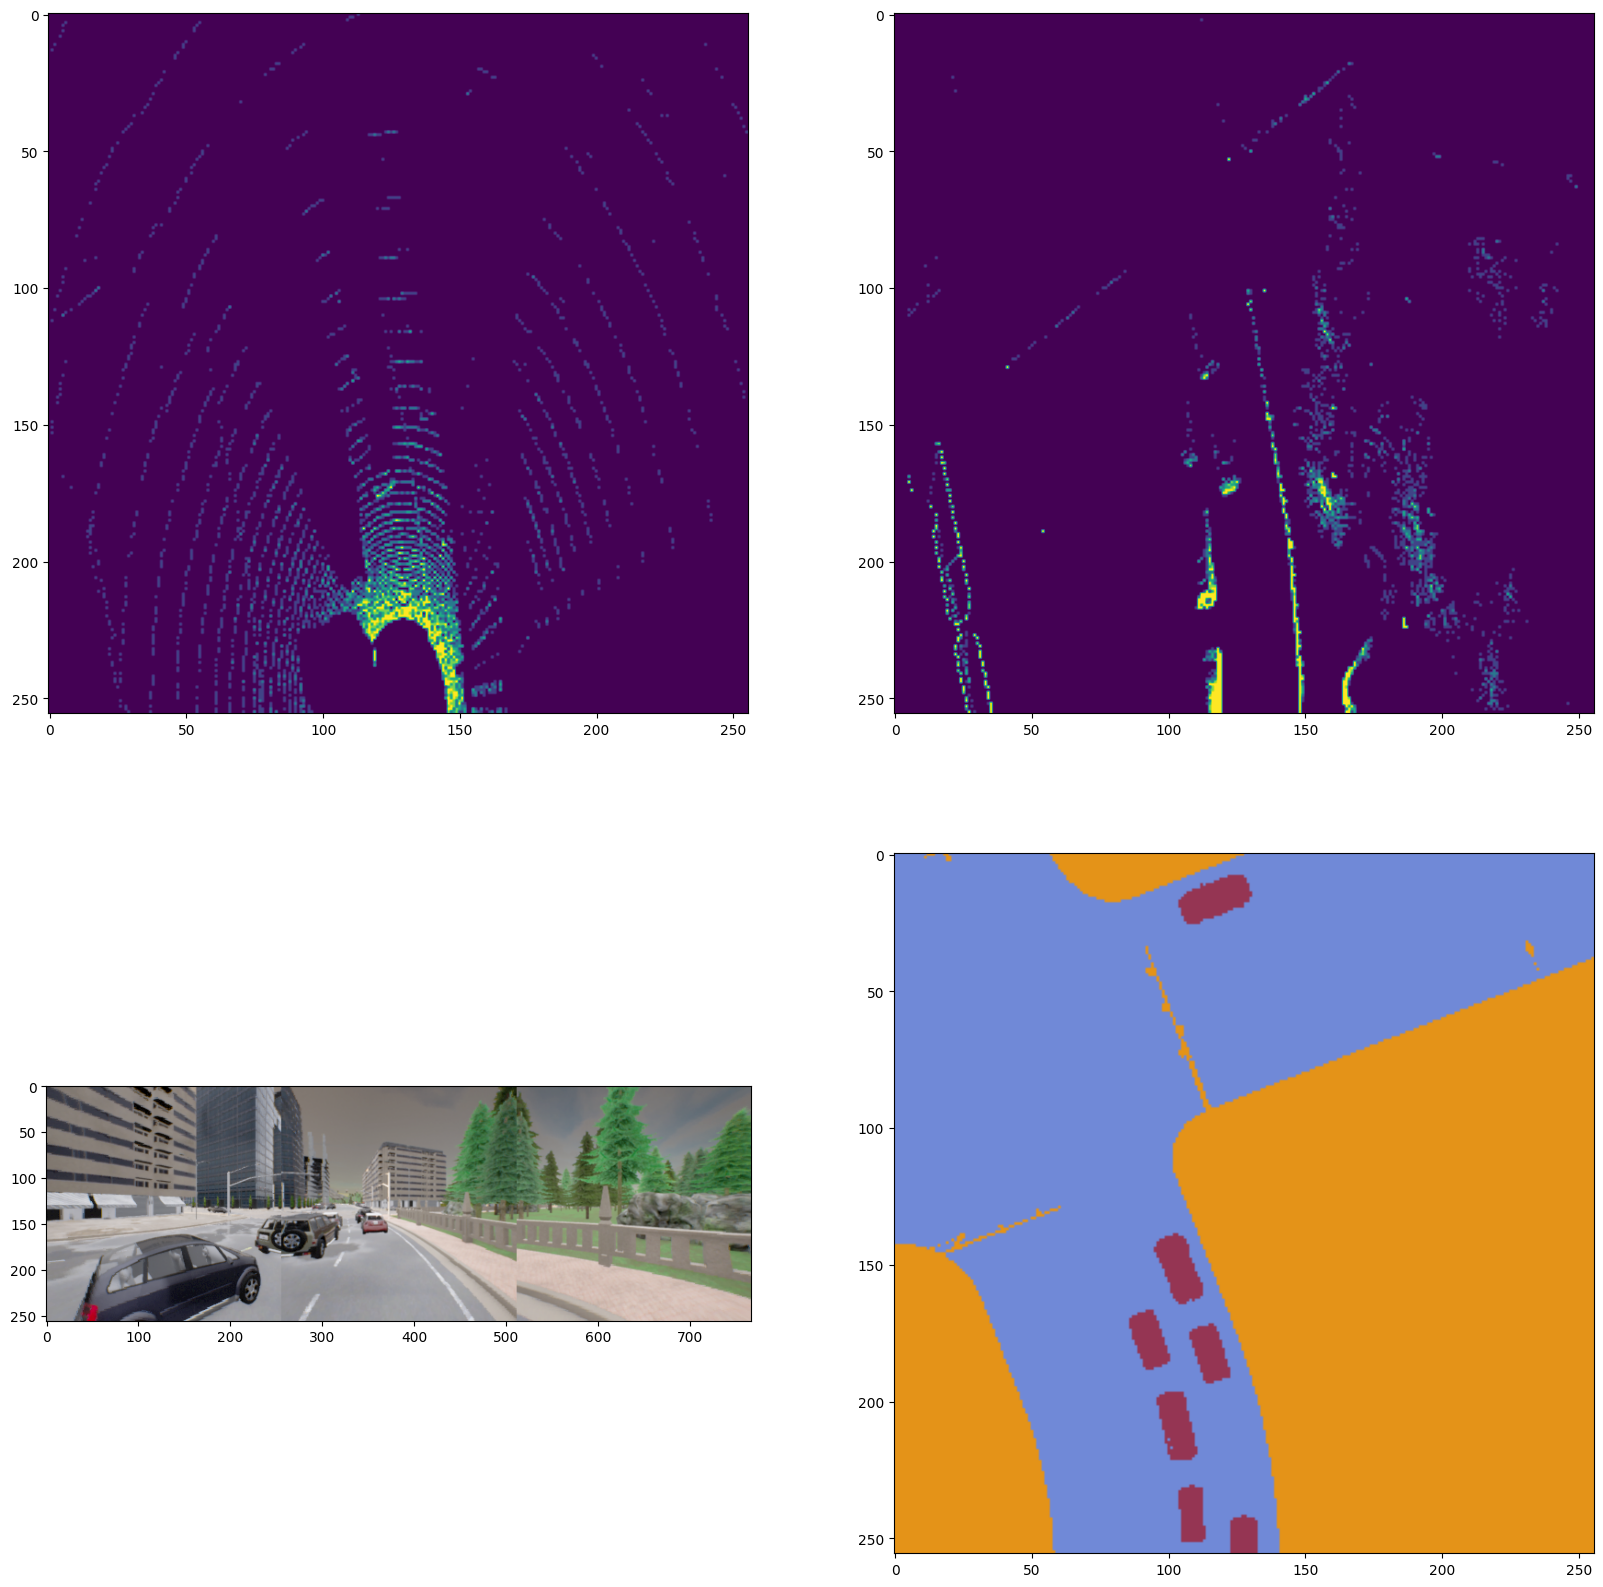

In [7]:
dataloader_val = DataLoader(val_set, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
for data in dataloader_val:
    lidar = data['lidar'][0][0]

    lfr = data['lfr']
    lfr_img_sample = lfr[0][0]
    print(lfr_img_sample.shape)
    seg_topdown = data['seg_topdown']
    seg_topdown_sample = seg_topdown[0][0]
    seg_topdown_sample = paint(seg_topdown_sample)
    f, axarr = plt.subplots(2, 2, figsize=(20, 20))
    axarr[0][0].imshow(lidar[0])
    axarr[0][1].imshow(lidar[1])
    axarr[1][0].imshow(lfr_img_sample)
    axarr[1][1].imshow(seg_topdown_sample)
    break

torch.Size([8, 3, 256, 256])
torch.Size([3, 256, 256])
(256, 256, 3)


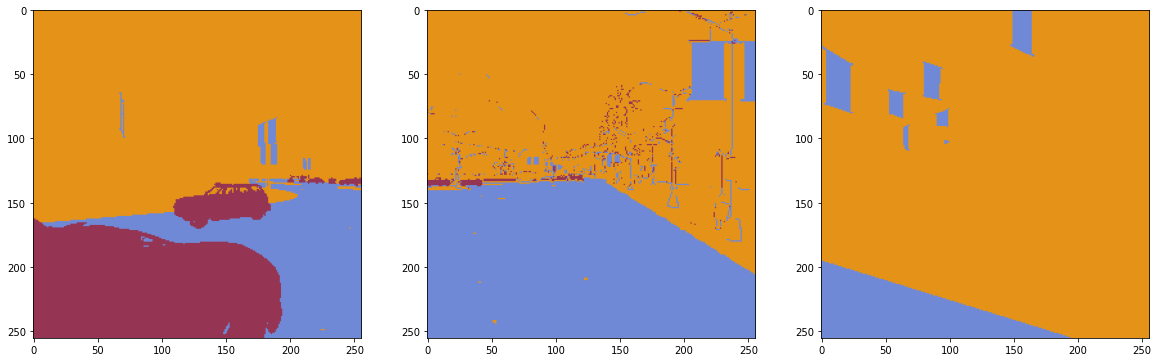

In [6]:
dataloader_train = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
for data in dataloader_train:
    seg_front = data['seg_fronts']
    seg_left = data['seg_lefts']
    seg_right = data['seg_rights']

    print(seg_front[0].shape)
    seg_front_sample = seg_front[0][0]
    seg_left_sample = seg_left[0][0]
    seg_right_sample = seg_right[0][0]

    print(seg_front_sample.shape)
    front = paint(seg_front_sample)
    left = paint(seg_left_sample)
    right = paint(seg_right_sample)
    print(left.shape)
    f, axarr = plt.subplots(1, 3, figsize=(20, 20))
    axarr[0].imshow(left)
    axarr[1].imshow(front)
    axarr[2].imshow(right)
    plt.show()
    break


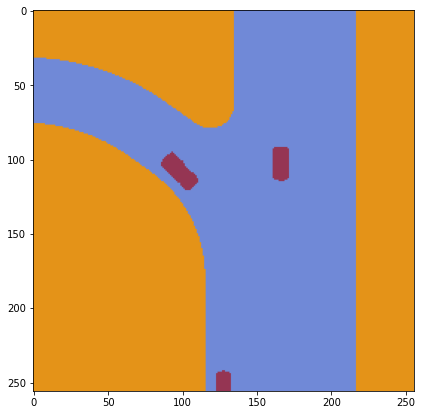

In [35]:
for data in dataloader_train:
    seg_topdown = data['seg_topdown']

    seg_topdown_sample = seg_topdown[0][0]
    topdown = paint(seg_topdown_sample)
    plt.figure(figsize = (7,7))
    plt.imshow(topdown)
    plt.show()
    break